# Final Project

Nama : Latifatuzikra Suhairi

Sanbercode DataScience - Batch 24

--------------------------------------------------------------------------------------------------------------------------------
**MASALAH:**

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

--------------------------------------------------------------------------------------------------------------------------------

In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


--------------------------------------------------------------------------------------------------------------------------------
# READING AND UNDERSANDING DATA

-------------------------------------------------------------------------------------------------------------------------------
**Shape data**

Dari csv tersebut terdapat 167 baris data dan 10 kolom

In [4]:
df.shape

(167, 10)

-------------------------------------------------------------------------------------------------------------------------------
**Info Data**

Dari csv tersebut ada 10 kolom, dimana tidak ada kolom yang memiliki nilai null/NaN:

Negara (type : object)

Kematian_anak (type : float64)

Ekspor (type : float64)

Kesehatan (type : float64)

Pendapatan (type : int64)

Inflasi(type : float64)

Harapan_hidup (type : float64)

Jumlah_fertiliti (type : float64)

GDPperkapita (type : int64)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


--------------------------------------------------------------------------------------------------------------------------------
**Deskripsi Data**

In [6]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


-------------------------------------------------------------------------------------------------------------------------------

# EXPLORATORY DATA ANALYSIS

**Cek Data Missing Value**

In [7]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [8]:
missing_values = ['na', '-']
df = pd.read_csv('Data_Negara_HELP.csv', na_values=missing_values)
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

------------------------------------------------------------------------------------------------------------------------------
**Univariate Analysis**

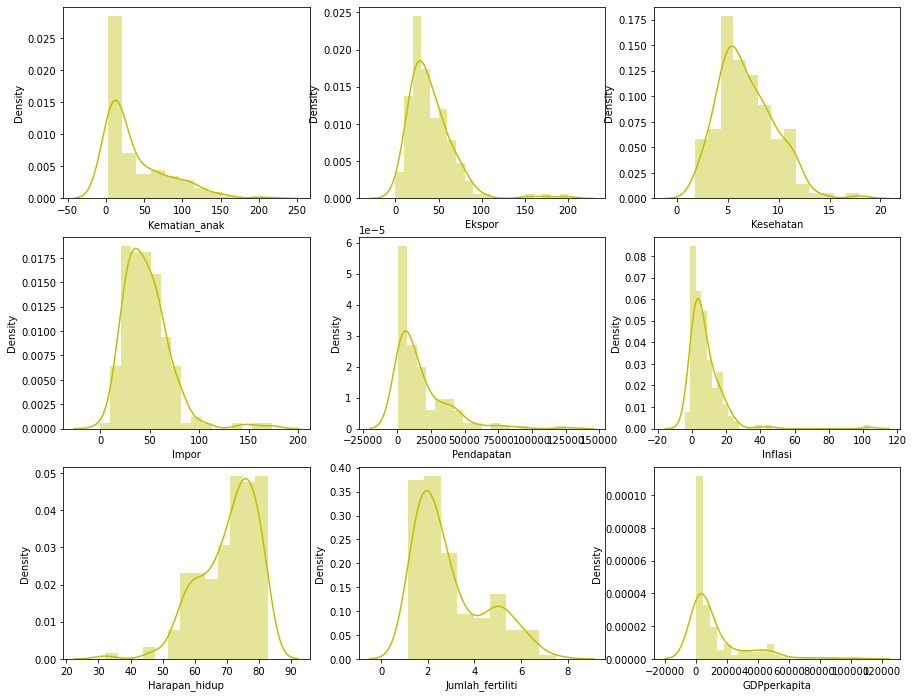

In [9]:
plt.figure(figsize=(15,12))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]], color='y')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

**Bivariate Analysis**

Melihat berdasarkan selisih ekspor import

In [10]:
df = df.assign(Selisih_EI = df['Ekspor'] - df['Impor'])
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Selisih_EI
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-6.1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,10.9
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-8.2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-4.4


**Melihat hubungan GDPperkapita dengan Pendapatan**

scatter plot GDPperkapita dengan Pendapatan


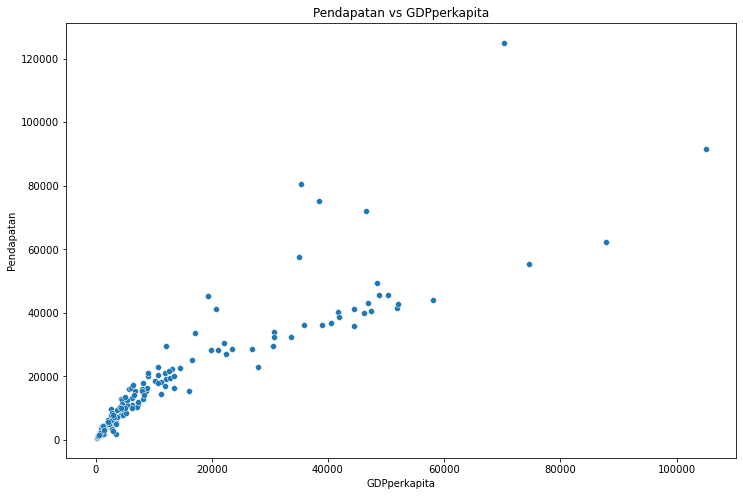

In [120]:
print('scatter plot GDPperkapita dengan Pendapatan')
plt.figure(figsize=(12,8))
sns.scatterplot(x='GDPperkapita', y='Pendapatan', data=df)
plt.title('Pendapatan vs GDPperkapita')
plt.show()


**Melihat Hubungan Selisih Ekspor-Impor dengan Pendapatan**

scatter plot EI-Pendapatan


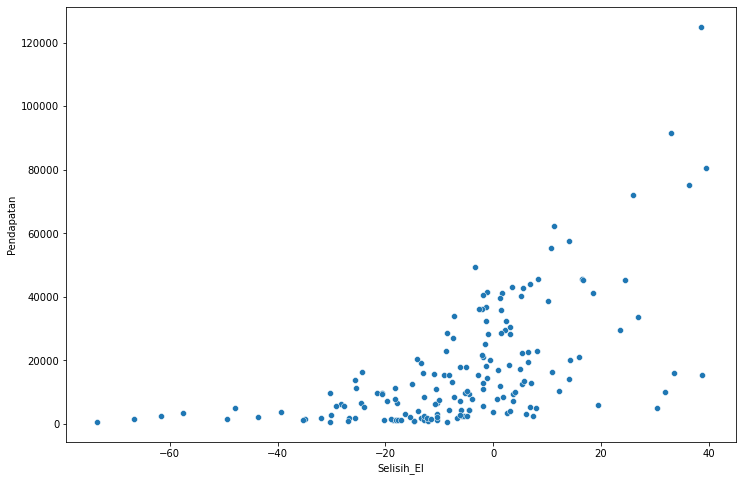

In [12]:
print('scatter plot EI-Pendapatan')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Selisih_EI', y='Pendapatan', data=df)
plt.show()

**Melihat Hubungan Selisih Ekspor-Impor dengan GDPperkapita**

scatter plot EI-GDPperkapita


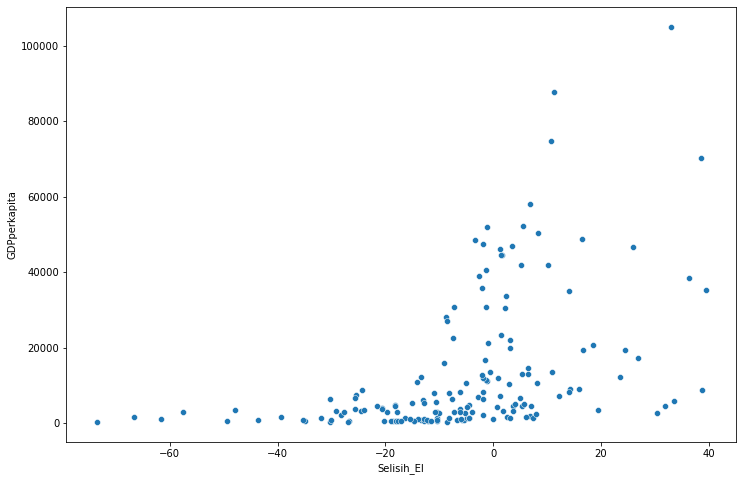

In [13]:
print('scatter plot EI-GDPperkapita')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Selisih_EI', y='GDPperkapita', data=df)
plt.show()

**Melihat hubungan Inflasi dengan Pendapatan**

scatter plot Inflasi-Pendapatan


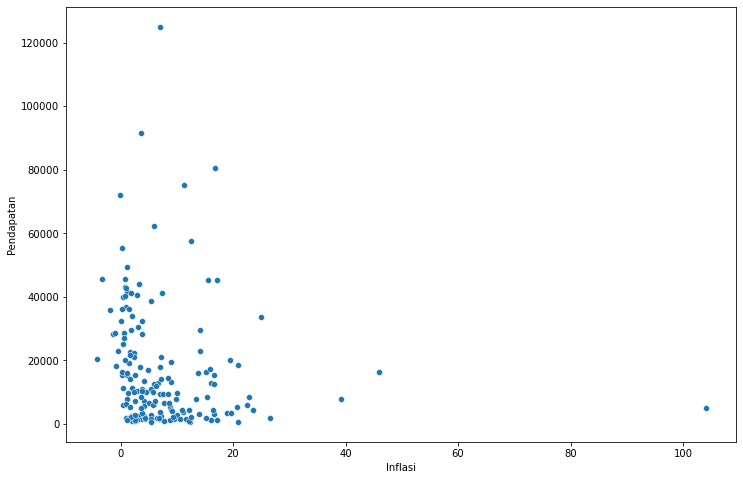

In [14]:
print('scatter plot Inflasi-Pendapatan')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Inflasi', y='Pendapatan', data=df)
plt.show()

**Melihat hubungan inflasi dengan GDPperkapita**

scatter plot Inflasi-GDPperkapita


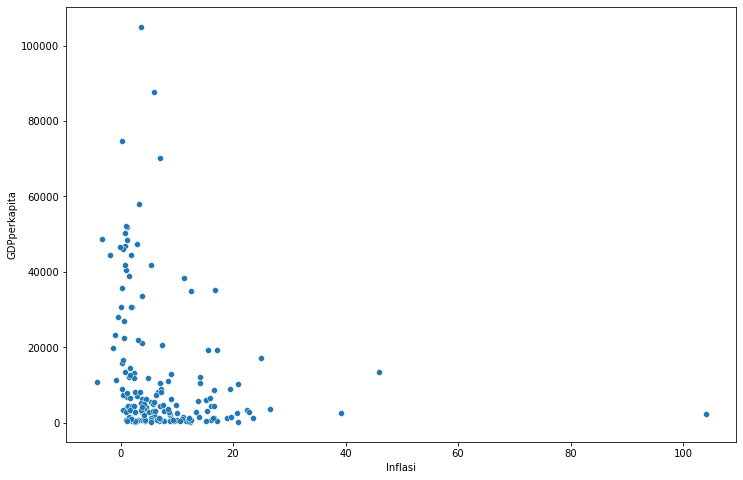

In [15]:
print('scatter plot Inflasi-GDPperkapita')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Inflasi', y='GDPperkapita', data=df)
plt.show()

**Melihat hubungan Selisih Ekpor-Impor dengan Inflasi**

scatter plot Selisih EI-Inflasi


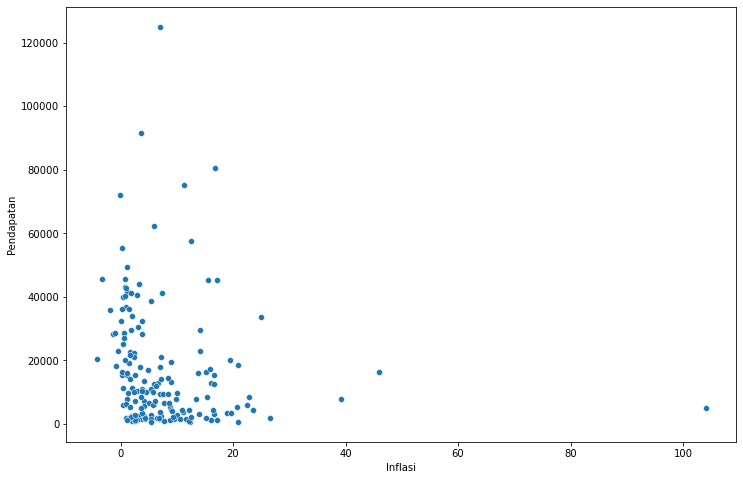

In [16]:
print('scatter plot Selisih EI-Inflasi')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Inflasi', y='Pendapatan', data=df)
plt.show()

**Melihat Hubungan Pendapatan dengan Kesehatan**

scatter plot Selisih Pendapatan-Kesehatan


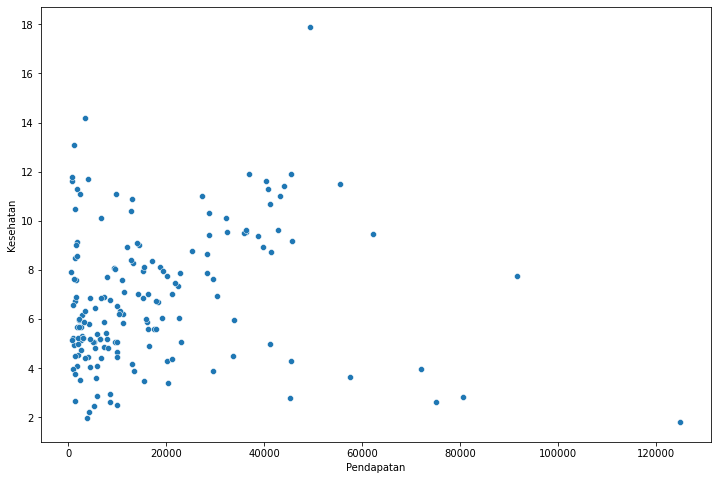

In [17]:
print('scatter plot Selisih Pendapatan-Kesehatan')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Pendapatan', y='Kesehatan', data=df)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

**Multivariate Analysis**

<Figure size 864x576 with 0 Axes>

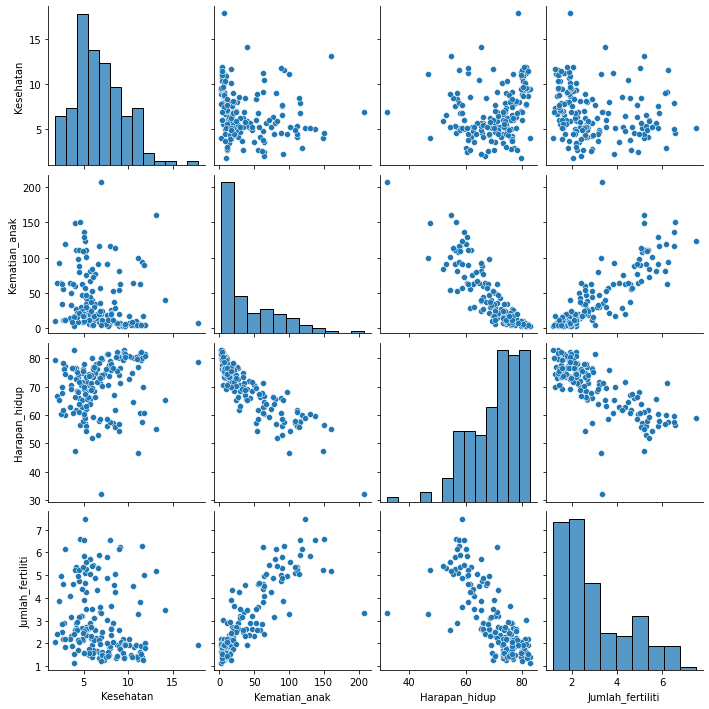

In [18]:
plt.figure(figsize=(12,8))
sns.pairplot(df[['Kesehatan', 'Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti']])

-------------------------------------------------------------------------------------------------------------------------
# OUTLIERS TREATMENT

<AxesSubplot:xlabel='Inflasi'>

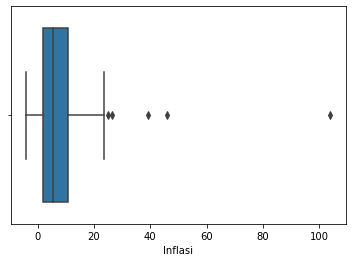

In [19]:
sns.boxplot('Inflasi', data=df)

<AxesSubplot:xlabel='Pendapatan'>

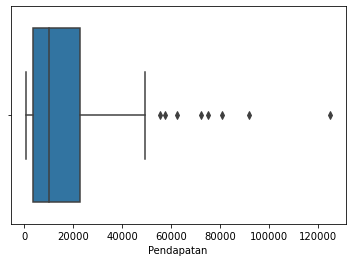

In [20]:
sns.boxplot('Pendapatan', data=df)

<AxesSubplot:xlabel='Kesehatan'>

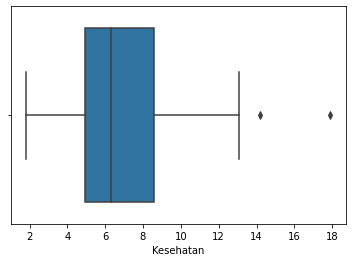

In [21]:
sns.boxplot('Kesehatan', data=df)

<AxesSubplot:xlabel='Selisih_EI'>

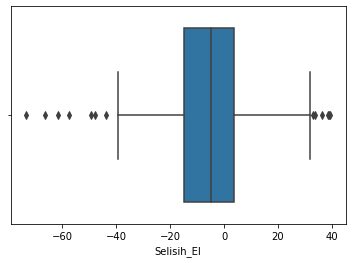

In [22]:
sns.boxplot('Selisih_EI', data=df)

**Melihat data pencilan**

In [23]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [24]:
print(finding_outlier(df['Inflasi']))
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['Selisih_EI']))

49      24.9
103     39.2
113    104.0
149     26.5
163     45.9
Name: Inflasi, dtype: float64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
9      33.6
23     39.4
55     38.8
66    -49.4
81    -66.6
82     36.3
87    -61.6
88    -73.5
91     33.0
101   -57.5
123    38.5
146   -43.7
151   -47.9
Name: Selisih_EI, dtype: float64


**Fungsi untuk menghapus outliers**

In [25]:
def hapus_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
 
    df_final = df[~(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
    return df_final

**Menghapus data pencilan pada feature Inflasi**

In [26]:
df2 = hapus_outlier(df[['Inflasi']])
df2.dropna(axis=0, inplace=True)

df2 = df2.assign(Selisih_EI = df['Selisih_EI'])
df2.head()

,Inflasi,Selisih_EI
0,9.44,-34.9
1,4.49,-20.6
2,16.10,7.0
3,22.40,19.4
4,1.44,-13.4


**Menghapus data pencilan pada feature Pendapatan dan Inflasi**

In [27]:
df3 = hapus_outlier(df[['Pendapatan', 'Kesehatan']])
df3.dropna(axis=0, inplace=True)
df3

,Pendapatan,Kesehatan
0,1610,7.58
1,9930,6.55
2,12900,4.17
3,5900,2.85
4,19100,6.03
...,...,...
162,2950,5.25
163,16500,4.91
164,4490,6.84
165,4480,5.18


# SCALING DATA

**Scaling Data Antara Inflasi dan Selisih EI**

In [28]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std2 = sc.fit_transform(df2.astype(float))

**Scaling Data Antara Pendapatan dan Kesehatan**

In [79]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std3 = sc.fit_transform(df3.astype(float))

------------------------------------------------------------------------------------------------------------------------------
# KMEANS CLUSTERING

**KMeans Selisih EI dan Inflasi**

In [30]:
#clustering with KMeans 

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std2)
labels1 = kmeans1.labels_
labels1

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [31]:
new_df = pd.DataFrame(data=df_std2, columns=['Selisih_EI', 'Inflasi'])
new_df['label1_kmeans'] = labels1
new_df

,Selisih_EI,Inflasi,label1_kmeans
0,0.157336,-1.541835,1
1,-0.312347,-0.784652,1
2,0.789274,0.676765,0
3,1.387054,1.333344,0
4,-0.601749,-0.403413,1
...,...,...,...
162,-0.489784,-0.016878,1
163,3.616865,0.883270,0
164,0.409732,-0.128073,1
165,1.500916,0.073136,0


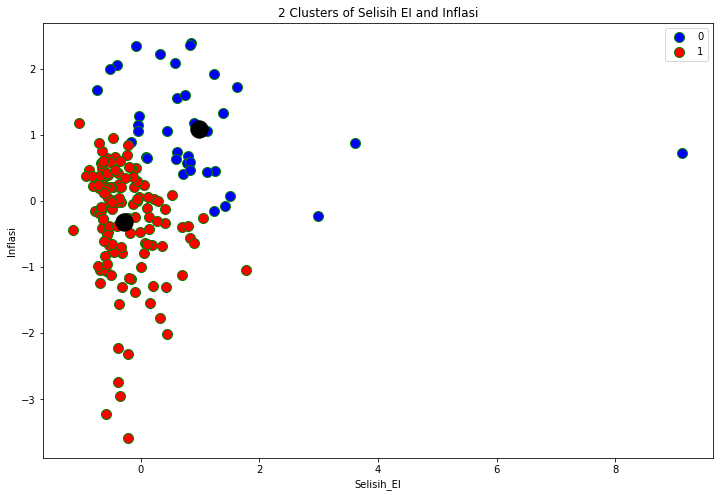

In [85]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Selisih_EI'][new_df.label1_kmeans==0], new_df['Inflasi'][new_df.label1_kmeans==0], c='blue', label=0, s=100, edgecolors='green')
plt.scatter(new_df['Selisih_EI'][new_df.label1_kmeans==1], new_df['Inflasi'][new_df.label1_kmeans==1], c='red', label=1, s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.title('2 Clusters of Selisih EI and Inflasi')
plt.xlabel('Selisih_EI')
plt.ylabel('Inflasi')
plt.legend()
plt.show()


**Elbow Method**

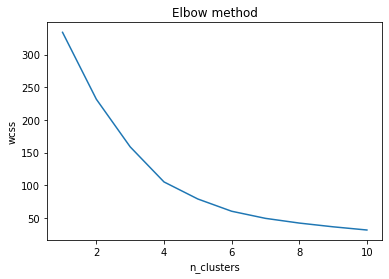

In [33]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [37]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std2)
labels2 = kmeans2.labels_

In [38]:
new_df['label2_kmeans'] = labels2
new_df

,Selisih_EI,Inflasi,label1_kmeans,label2_kmeans
0,0.157336,-1.541835,1,0
1,-0.312347,-0.784652,1,0
2,0.789274,0.676765,0,3
3,1.387054,1.333344,0,3
4,-0.601749,-0.403413,1,1
...,...,...,...,...
162,-0.489784,-0.016878,1,1
163,3.616865,0.883270,0,3
164,0.409732,-0.128073,1,1
165,1.500916,0.073136,0,3


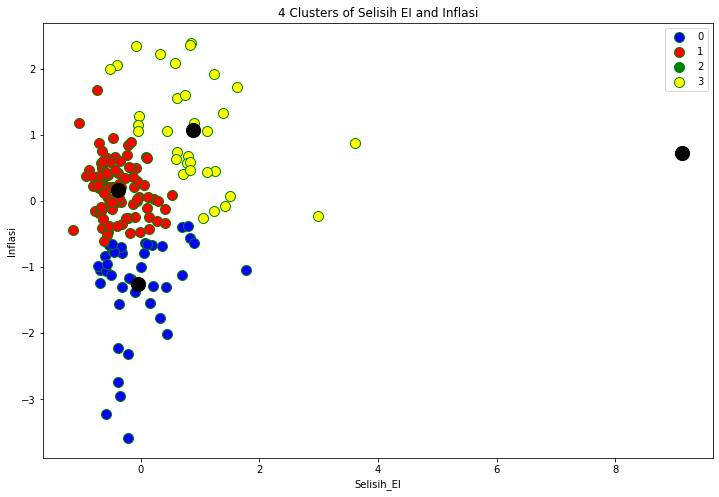

In [88]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Selisih_EI'][new_df.label2_kmeans==0], new_df['Inflasi'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Selisih_EI'][new_df.label2_kmeans==1], new_df['Inflasi'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Selisih_EI'][new_df.label2_kmeans==2], new_df['Inflasi'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Selisih_EI'][new_df.label2_kmeans==3], new_df['Inflasi'][new_df.label2_kmeans==3], label='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=200)
plt.title('4 Clusters of Selisih EI and Inflasi')
plt.xlabel('Selisih_EI')
plt.ylabel('Inflasi')
plt.legend()
plt.show()

In [90]:
df['K_means_labels'] = kmeans2.labels_
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3


In [99]:
ei_inflasi = df[(df['K_means_labels']==0)]
ei_inflasi

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
14,Belarus,5.5,51.40,5.61,64.5,16200,15.100,70.4,1.49,6030,0
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,0
20,Bosnia and Herzegovina,6.9,29.70,11.10,51.3,9720,1.400,76.8,1.31,4610,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
30,Cape Verde,26.5,32.70,4.09,61.8,5830,0.505,72.5,2.67,3310,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
48,El Salvador,19.2,26.90,6.91,46.6,7300,2.650,74.1,2.27,2990,0


-------------------------------------------------------------------------------------------------------------------------------

**KMeans Pendapatan dan Kesehatan**

In [54]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters = 2, random_state=42).fit(df_std3)
labels3 = kmeans3.labels_
labels3

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [55]:
new_df2 = pd.DataFrame(data=df_std3, columns=['Pendapatan', 'Kesehatan'])
new_df2['label3_kmeans'] = labels3
new_df2

,Pendapatan,Kesehatan,label3_kmeans
0,-0.808245,0.279088,1
1,-0.375369,-0.097016,1
2,-0.220844,-0.966073,1
3,-0.585043,-1.448071,1
4,0.101732,-0.286894,1
...,...,...,...
162,-0.738527,-0.571711,1
163,-0.033542,-0.695862,1
164,-0.658404,0.008877,1
165,-0.658924,-0.597272,1


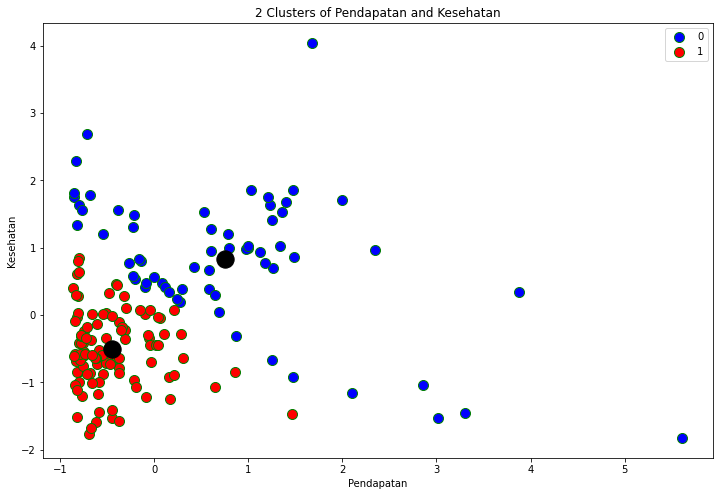

In [100]:
plt.figure(figsize=(12,8))

plt.scatter(new_df2['Pendapatan'][new_df2.label3_kmeans==0], new_df2['Kesehatan'][new_df2.label3_kmeans==0], c='blue', label=0, s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label3_kmeans==1], new_df2['Kesehatan'][new_df2.label3_kmeans==1], c='red', label=1, s=100, edgecolors='green')

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], c='k', s=300)

plt.title('2 Clusters of Pendapatan and Kesehatan')
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.legend()
plt.show()

**Elbow Method**

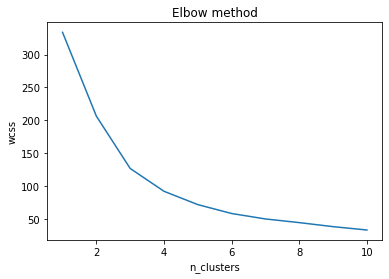

In [57]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std3)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [109]:
kmeans4 = KMeans(n_clusters = 6, init='k-means++', random_state=42)
kmeans4.fit(df_std3)
labels4 = kmeans4.labels_

new_df2['label4_kmeans'] = labels4
new_df2

,Pendapatan,Kesehatan,label3_kmeans,label4_kmeans
0,-0.808245,0.279088,1,3
1,-0.375369,-0.097016,1,0
2,-0.220844,-0.966073,1,0
3,-0.585043,-1.448071,1,0
4,0.101732,-0.286894,1,0
...,...,...,...,...
162,-0.738527,-0.571711,1,0
163,-0.033542,-0.695862,1,0
164,-0.658404,0.008877,1,0
165,-0.658924,-0.597272,1,0


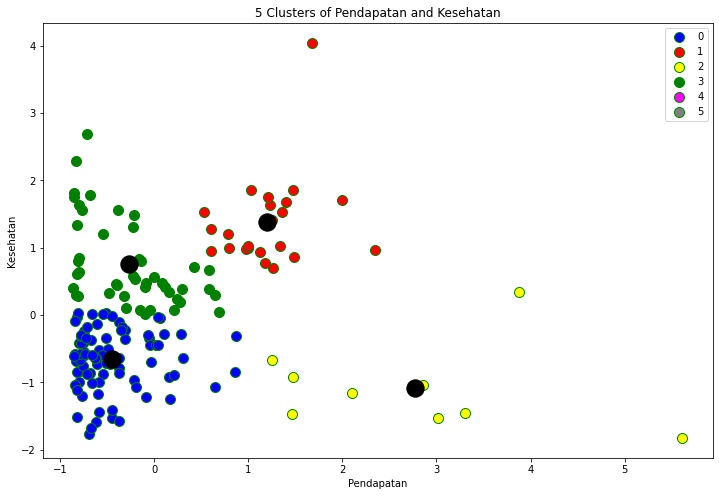

In [119]:
plt.figure(figsize=(12,8))

plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==0], new_df2['Kesehatan'][new_df2.label4_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==1], new_df2['Kesehatan'][new_df2.label4_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==2], new_df2['Kesehatan'][new_df2.label4_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==3], new_df2['Kesehatan'][new_df2.label4_kmeans==3], label='3', c='green', s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==4], new_df2['Kesehatan'][new_df2.label4_kmeans==4], label='4', c='magenta', s=100, edgecolors='green')
plt.scatter(new_df2['Pendapatan'][new_df2.label4_kmeans==5], new_df2['Kesehatan'][new_df2.label4_kmeans==5], label='5', c='grey', s=100, edgecolors='green')


plt.title('5 Clusters of Pendapatan and Kesehatan')
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [115]:
df['K_means_labels'] = kmeans4.labels_
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [116]:
pdptn_kes= df[(df['K_means_labels']==0)]
pdptn_kes

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


-------------------------------------------------------------------------------------------------------------------------------

# SUMMARY

In [117]:
finall = df[(df['K_means_labels']==0) & (df['K_means_labels']==0)]
finall.sort_values(by=['Pendapatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.87,65.9,4.75,769,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,0
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,0
